___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
store=pd.read_csv('store_sharing.csv', encoding="windows-1252")
store.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [57]:
# store.isna().count()

In [3]:
store.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [4]:
store.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [5]:
season_index=store.season.value_counts().index
season_index

Float64Index([0.0, 1.0, 3.0, 2.0], dtype='float64')

In [6]:
season_val=store.season.value_counts().values
season_val

array([4394, 4387, 4330, 4303], dtype=int64)

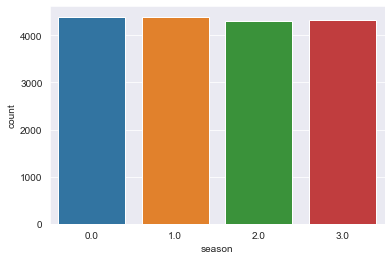

In [7]:
# season

sns.barplot(x=season_index, y=season_val, data=store)
plt.xlabel("season")
plt.ylabel("count")
plt.show()

In [9]:
store.is_holiday.value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

In [10]:
holiday_index=store.is_holiday.value_counts().index
holiday_index

Float64Index([0.0, 1.0], dtype='float64')

In [11]:
holiday_val=store.is_holiday.value_counts().values
holiday_val

array([17030,   384], dtype=int64)

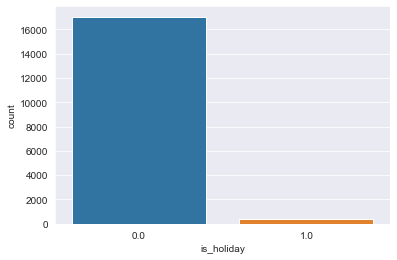

In [12]:
# is_holiday
sns.barplot(x=holiday_index, y=holiday_val, data=store)
plt.xlabel("is_holiday")
plt.ylabel("count")
plt.show()

In [13]:
store.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [14]:
weekend_index=store.is_weekend.value_counts().index
weekend_index

Float64Index([0.0, 1.0], dtype='float64')

In [15]:
weekend_val=store.is_weekend.value_counts().values
weekend_val

array([12444,  4970], dtype=int64)

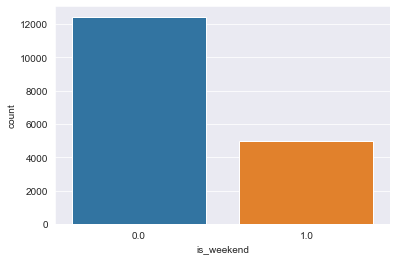

In [16]:
# is_weekend
sns.barplot(x=weekend_index, y=weekend_val, data=store)
plt.xlabel("is_weekend")
plt.ylabel("count")
plt.show()

In [17]:
store.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [18]:
weather_index=store.weather_code.value_counts().index
weather_index

Float64Index([1.0, 2.0, 3.0, 7.0, 4.0, 26.0, 10.0], dtype='float64')

In [20]:
weather_val=store.weather_code.value_counts().values
weather_val

array([6150, 4034, 3551, 2141, 1464,   60,   14], dtype=int64)

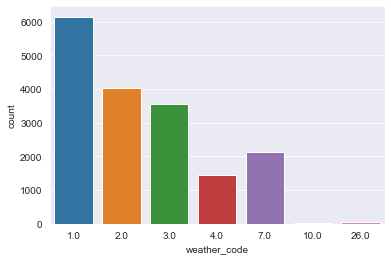

In [21]:
# weather_code
sns.barplot(x=weather_index, y=weather_val, data=store)
plt.xlabel("weather_code")
plt.ylabel("count")
plt.show()

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [22]:
store.timestamp.value_counts()

2015-09-25 07:00:00    1
2015-12-11 13:00:00    1
2015-01-09 19:00:00    1
2015-06-15 07:00:00    1
2015-01-13 00:00:00    1
                      ..
2015-01-14 06:00:00    1
2015-11-08 06:00:00    1
2016-08-04 00:00:00    1
2016-07-09 12:00:00    1
2015-01-07 11:00:00    1
Name: timestamp, Length: 17414, dtype: int64

In [23]:
store.groupby("timestamp")[["cnt", "t1", "t2", "hum", "wind_speed", "weather_code", "is_holiday", "is_weekend", "season"]].sum().head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [24]:
store.timestamp = pd.to_datetime(store.timestamp)

In [25]:
year_month=store.timestamp.dt.strftime('%Y-%m')
year_month

0        2015-01
1        2015-01
2        2015-01
3        2015-01
4        2015-01
          ...   
17409    2017-01
17410    2017-01
17411    2017-01
17412    2017-01
17413    2017-01
Name: timestamp, Length: 17414, dtype: object

In [26]:
year= store.timestamp.dt.year
year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
17409    2017
17410    2017
17411    2017
17412    2017
17413    2017
Name: timestamp, Length: 17414, dtype: int64

In [27]:
month = store.timestamp.dt.month
month

0        1
1        1
2        1
3        1
4        1
        ..
17409    1
17410    1
17411    1
17412    1
17413    1
Name: timestamp, Length: 17414, dtype: int64

In [28]:
day_of_month= store.timestamp.dt.day
day_of_month

0        4
1        4
2        4
3        4
4        4
        ..
17409    3
17410    3
17411    3
17412    3
17413    3
Name: timestamp, Length: 17414, dtype: int64

In [29]:
day_of_week = store.timestamp.dt.dayofweek
day_of_week

0        6
1        6
2        6
3        6
4        6
        ..
17409    1
17410    1
17411    1
17412    1
17413    1
Name: timestamp, Length: 17414, dtype: int64

In [30]:
hour= store.timestamp.dt.hour
hour

0         0
1         1
2         2
3         3
4         4
         ..
17409    19
17410    20
17411    21
17412    22
17413    23
Name: timestamp, Length: 17414, dtype: int64

In [31]:
store2= store.assign(year_month=store.timestamp.dt.strftime('%Y-%m'), year= store.timestamp.dt.year, month = store.timestamp.dt.month, day_of_month= store.timestamp.dt.day, day_of_week = store.timestamp.dt.dayofweek, hour=store.timestamp.dt.hour )

In [32]:
store2.groupby("timestamp")[["cnt", "t1", "t2", "hum", "wind_speed", "weather_code", "is_holiday", "is_weekend", "season", "year_month", "year", "month", "day_of_month","day_of_week", "hour" ]].sum().head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

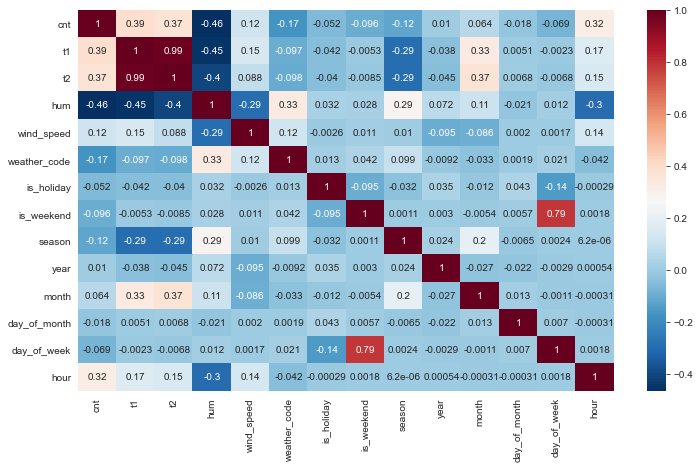

In [33]:
# for all variables 
fig, ax= plt.subplots(figsize = (12,7))
sns.heatmap(data=store2.corr(), cmap="RdBu_r", annot=True );

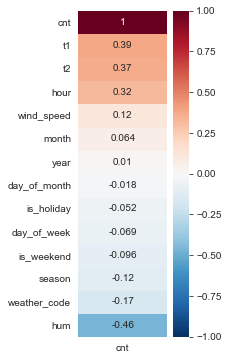

In [34]:
# for the target variable

fig, ax = plt.subplots(figsize=(2,6))
sns.heatmap(store2.corr()[['cnt']].sort_values('cnt'), vmax=1, vmin=-1, cmap="RdBu_r", annot=True,ax=ax)
ax.invert_yaxis()
plt.show()

### 8. Visualize the correlation of the target variable and the other features with barplot

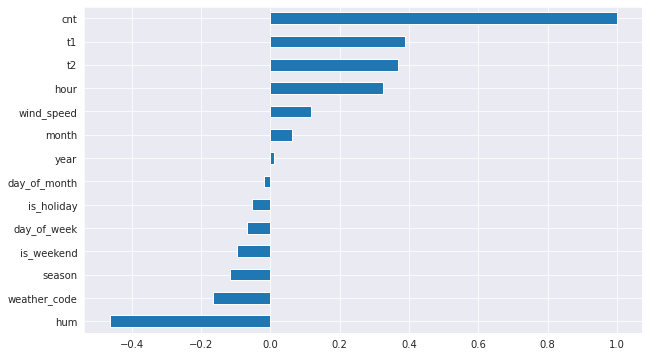

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

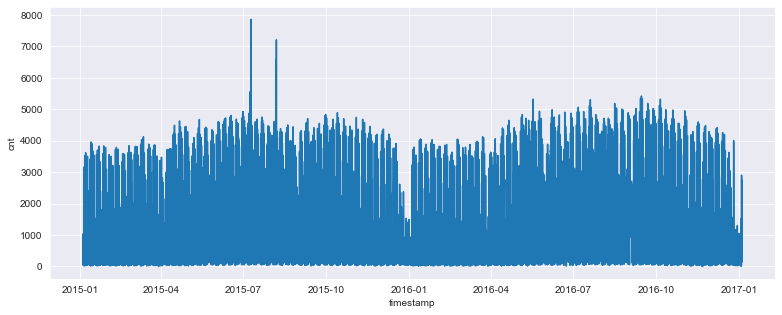

In [43]:
plt.figure(figsize=(13,5))
sns.lineplot(data=store2, x='timestamp', y='cnt', err_style='bars')
plt.show()

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

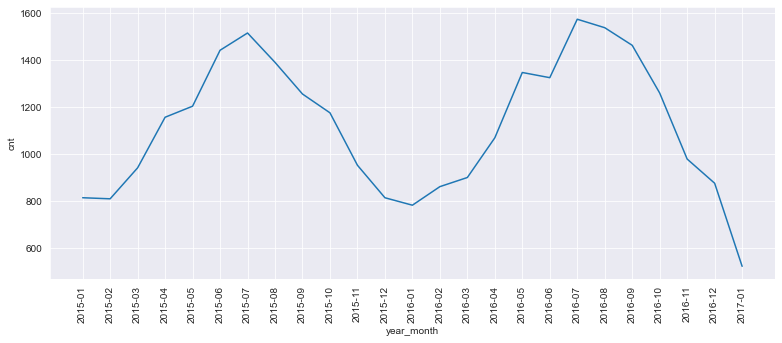

In [56]:
# with lineplot
fig, ax = plt.subplots(figsize=(13,5))
plt.xticks(rotation=90)
sns.lineplot(x='year_month', y='cnt',data=store2, ci=None )
plt.show()

<AxesSubplot:xlabel='month', ylabel='cnt'>

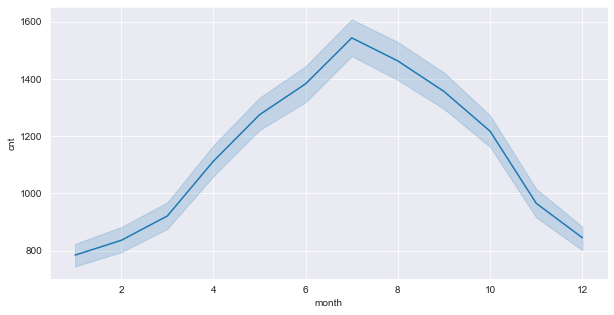

In [58]:
# with lineplot
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='month', y='cnt',data=store2)

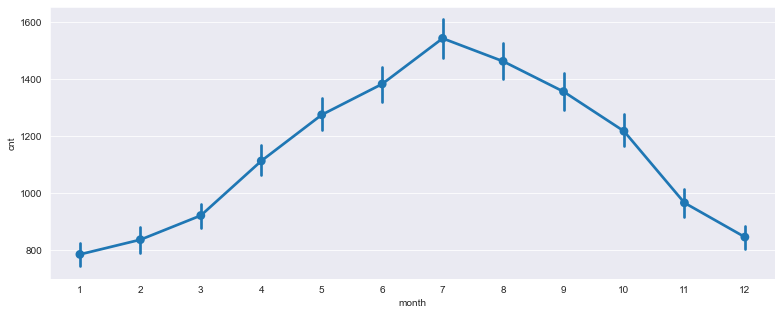

In [59]:
# with pointplot
fig, ax = plt.subplots(figsize=(13,5))
sns.pointplot(x="month", y="cnt", data=store2)
plt.show()

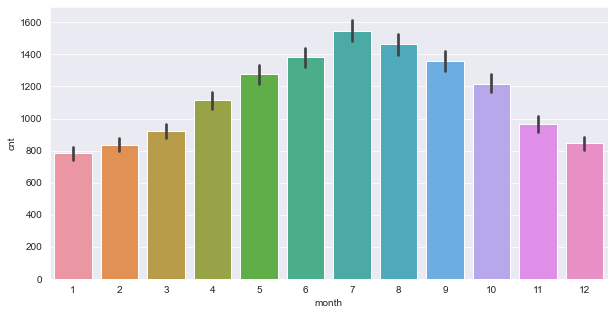

In [60]:
# with barplot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x = "month", y = "cnt", data=store2)
plt.show()

### 11.Plot bike shares by hours on (holidays, weekend, season)

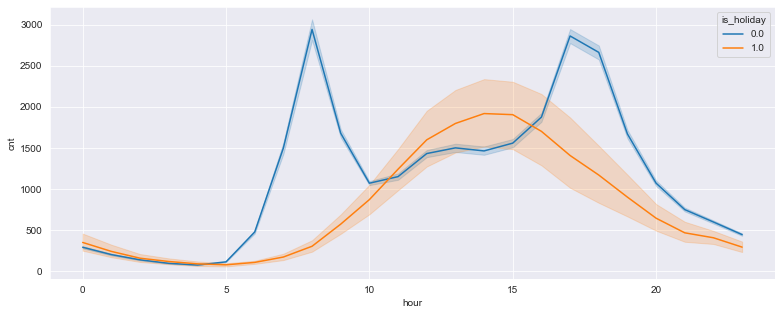

In [62]:
# with lineplot (*whether it is a holiday or not*)
fig, ax = plt.subplots(figsize=(13,5))
sns.lineplot(data=store2, x="hour", y="cnt", hue="is_holiday")
plt.show()

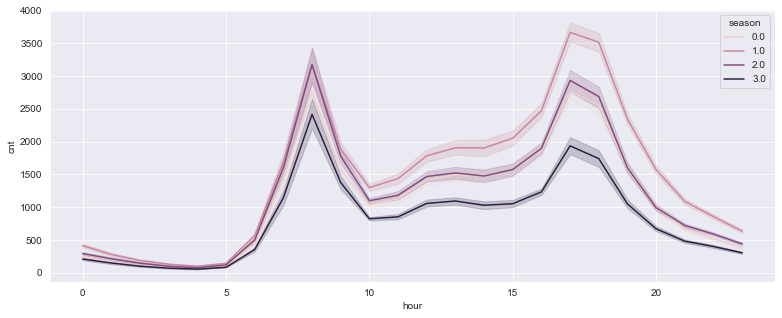

In [64]:
# with lineplot (*You may want to see seasonal breakdowns*)
fig, ax = plt.subplots(figsize=(13,5))
sns.lineplot(data=store2, x="hour", y="cnt", hue="season")
plt.show()

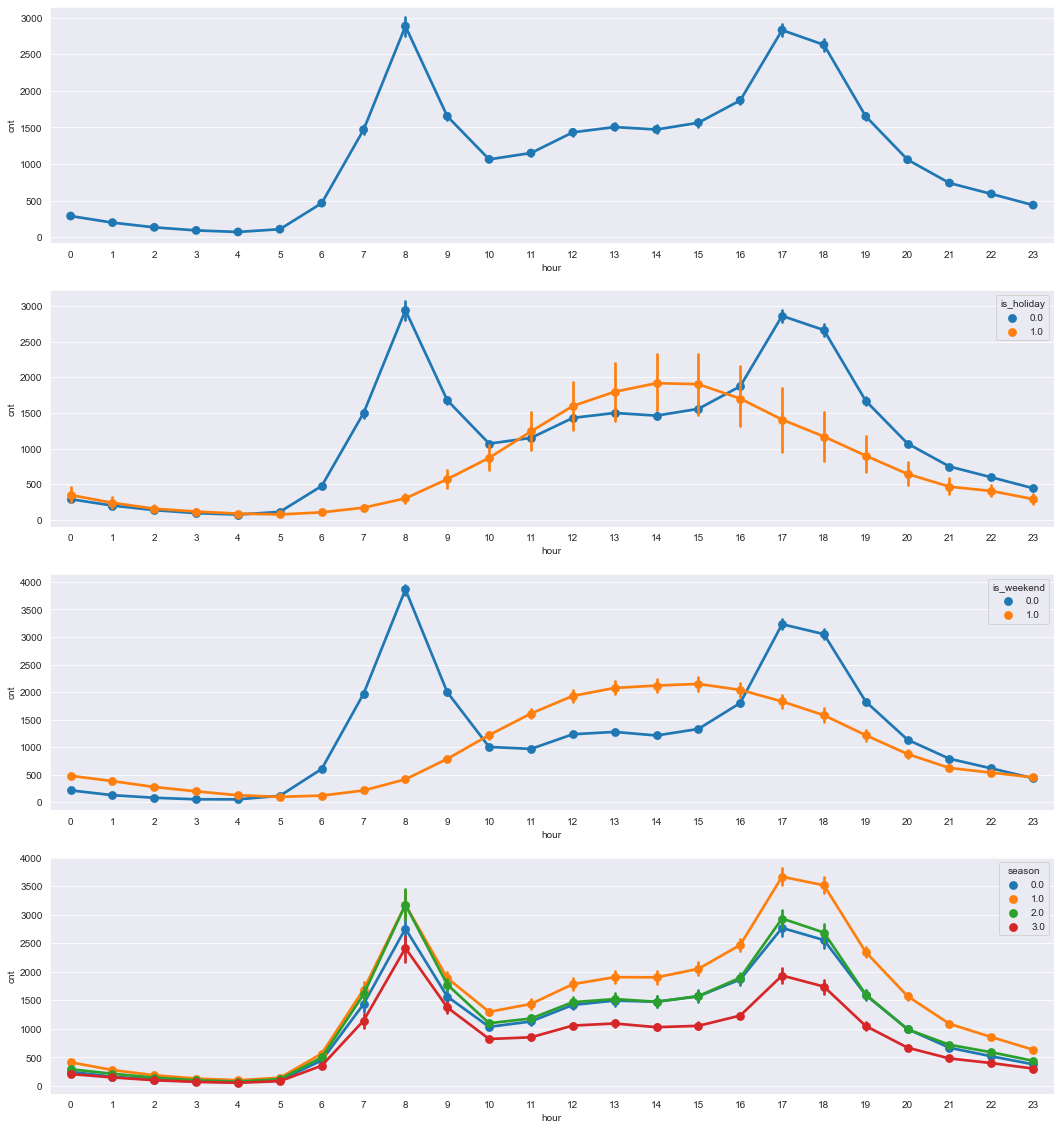

In [80]:
# with pointplot

fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows=4)
fig.set_size_inches(18,20)
sns.pointplot(x="hour", y="cnt", data=store2, ax=ax1)
sns.pointplot(x="hour", y="cnt", data=store2, hue="is_holiday", ax=ax2)
sns.pointplot(x="hour", y="cnt", data=store2, hue="is_weekend", ax=ax3)
sns.pointplot(x="hour", y="cnt", data=store2, hue="season", ax=ax4)
plt.show()

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

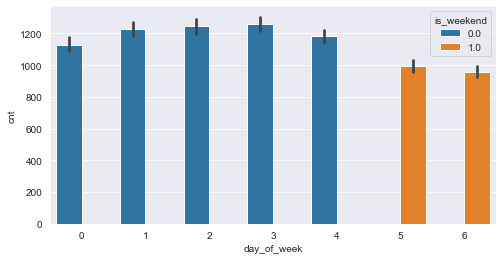

In [82]:
# with barplot
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x = "day_of_week", y = "cnt", data=store2, hue="is_weekend")
plt.show()

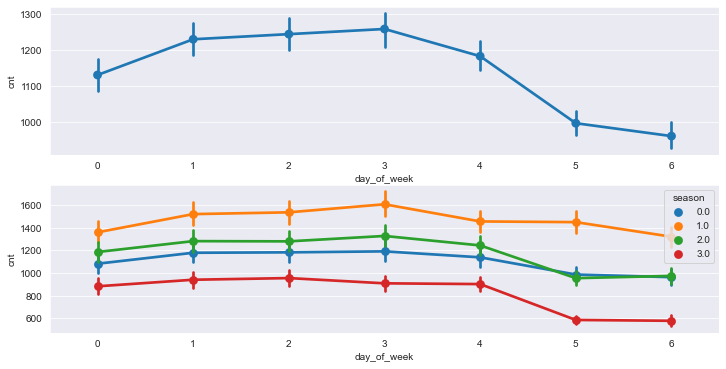

In [86]:
# with pointplot
fig,(ax1,ax2)=plt.subplots(nrows=2)
fig.set_size_inches(12,6)
sns.pointplot(x="day_of_week", y="cnt", data=store2, ax=ax1)
sns.pointplot(x="day_of_week", y="cnt", data=store2, hue="season", ax=ax2)
plt.show()

### 13.Plot bike shares by day of month

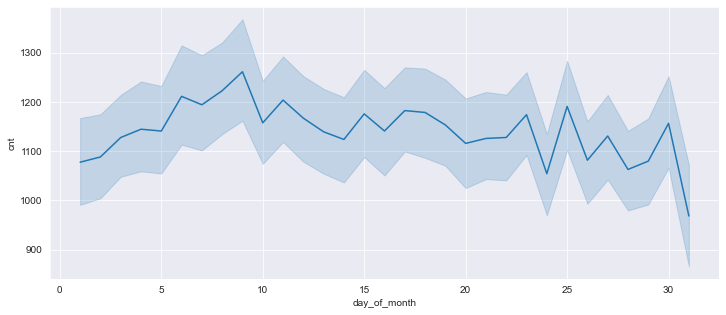

In [89]:
#with lineplot
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x='day_of_month', y='cnt',data=store2)
plt.show()

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

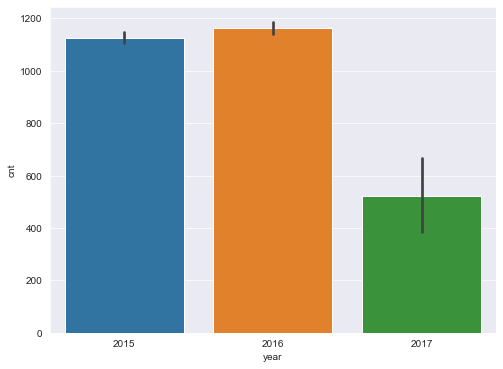

In [91]:
# with barplot
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x = "year", y = "cnt", data=store2)
plt.show()

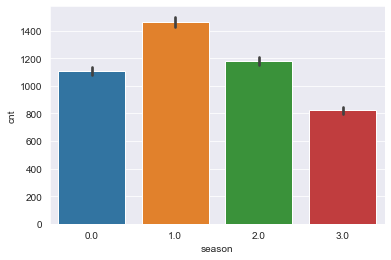

In [96]:
# with barplot
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x = "season", y = "cnt", data=store2)
plt.show()

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [98]:
s= store2.is_weekend.value_counts()
s

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

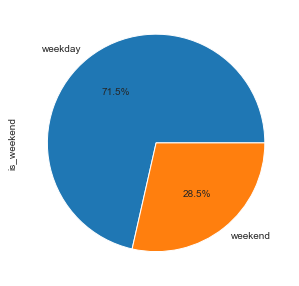

In [102]:
# pie chart
fig, ax = plt.subplots(figsize=(10,5))
label = "weekday", "weekend"
s.plot.pie(labels= label, autopct="%.1f%%");

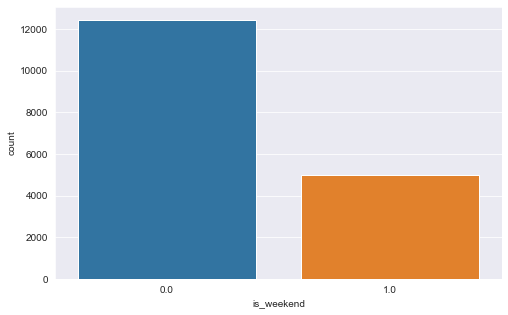

In [124]:
# with countplot
fig, ax= plt.subplots(figsize = (8,5))

sns.countplot(x="is_weekend", data=store2)
plt.show()

### 16.Plot the distribution of weather code by seasons

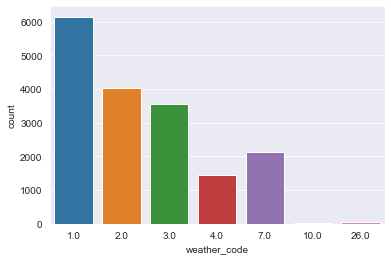

In [115]:
# with countplot
fig, ax= plt.subplots(figsize = (6,4))
sns.countplot(x="weather_code", data=store2)
plt.show()

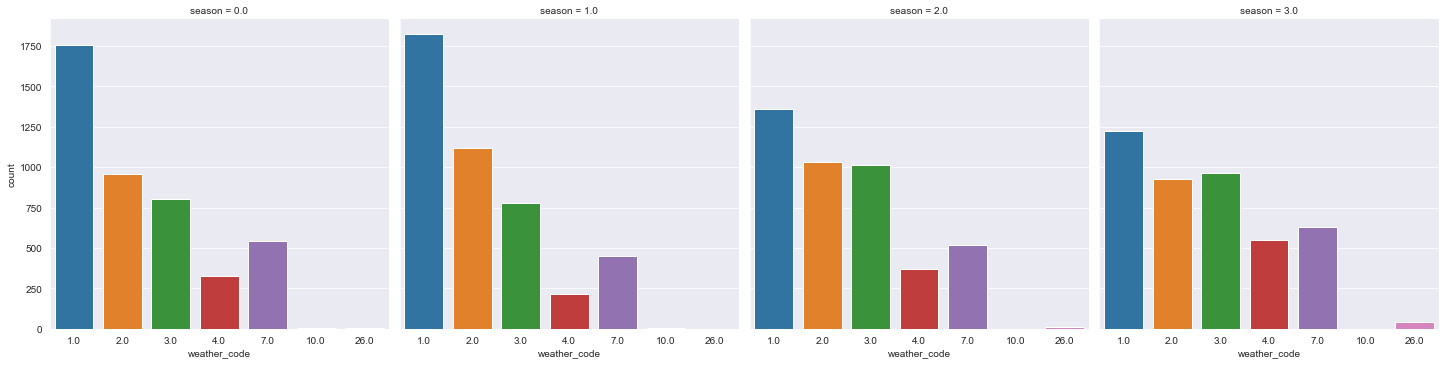

In [121]:
# with catplot
sns.catplot(x = "weather_code", 
                   data = store2, 
                   col='season',
                   kind='count',
                   col_wrap=4,)

plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___